In [10]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings

In [11]:
# Disable all warnings
warnings.filterwarnings('ignore')

In [12]:
# Use pandas to read the csv as a dataframe
df = pd.read_csv(r'us_retail_sales.csv')

In [13]:
# Check the top of the dataframe
df.head(2)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0


In [14]:
# Check the types of data
df.dtypes

YEAR      int64
JAN       int64
FEB       int64
MAR       int64
APR       int64
MAY       int64
JUN       int64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [15]:
# Use pandas melt to arrange the data into rows that contain year, month and value
df_long = pd.melt(df, id_vars = ['YEAR'], value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 
                                                       'NOV', 'DEC'], var_name = 'month', value_name = 'value')

In [16]:
df_long.head()

,YEAR,month,value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [17]:
# Create a dictionary of month names and month numbers
month_dict = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}
# Use that dictionary to replace the values in the month column with numbers
df_long.month = df_long.month.replace(month_dict)

In [18]:
# Check the head of the dataframe to make sure the change was made
df_long.head()

,YEAR,month,value
0,1992,1,146925.0
1,1993,1,157555.0
2,1994,1,167518.0
3,1995,1,182413.0
4,1996,1,189135.0


In [19]:
# Create a column called date that combines the year and month columns
df_long['date'] = df_long.YEAR.astype(str) + '-' + df_long.month.astype(str) + '-01'
# Use to_datetime to convert the values in the date column to datetime objects
df_long.date = pd.to_datetime(df_long.date)
# Drop the YEAR and month columns now that we have a date column
df_long = df_long.drop(['YEAR', 'month'], axis = 1)

In [20]:
# Check the top of the modified dataframe
df_long.head()

,value,date
0,146925.0,1992-01-01
1,157555.0,1993-01-01
2,167518.0,1994-01-01
3,182413.0,1995-01-01
4,189135.0,1996-01-01


1. Plot the data with proper labeling and make some observations on the graph.

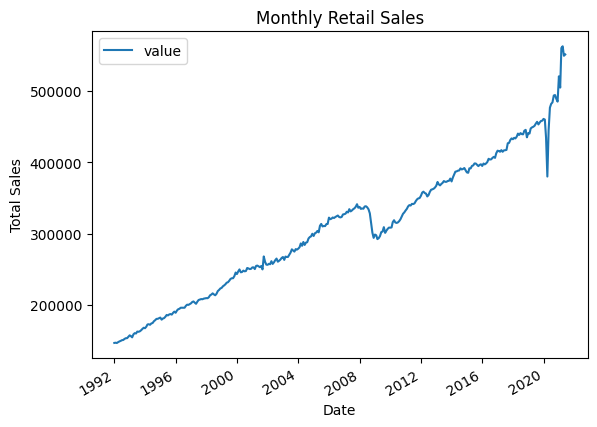

In [21]:
# Set the df index to date
df_long.set_index('date', inplace = True)
# Initiate a plot
df_long.plot()
# Give the plot a title and x/y labels
plt.title('Monthly Retail Sales')
plt.xlabel('Date') 
plt.ylabel('Total Sales')
# Show the plot
plt.show()

Observations: 

- There is an overall increase in retail sales from 1992 to 2021.
- There is a low spike around 2008. This makes sense because there was financial hardship after the housing market collapsed at that time.
- There is also a sizeable dip in 2020. This makes sense because the economy slowed as people sheltered in place during the early Covid-19 pandemic and most people spent far less money.

In [22]:
# Reset the dataframe index to its original index (to work with the df later)
df_long = df_long.reset_index(drop = False)

2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [23]:
# Check the columns to ensure the index was reset correctly
df_long.columns

Index(['date', 'value'], dtype='object')

In [24]:
# Create datetime variables for the ending of the date range for the test set and the beginning of the date range for the test set
test_end = pd.to_datetime('2021-06-01')
test_start = pd.to_datetime('2020-07-01')
# Split the dataframe into a df with training data and a df with test data
train_df = df_long[df_long.date < test_start]
test_df = df_long[(df_long.date >= test_start) & (df_long.date <= test_end)]

In [25]:
# Check the length of each dataframe
print('The length of the training df is: ', len(train_df))
print('The length of the test df is: ', len(test_df))

The length of the training df is:  342
The length of the test df is:  12


In [26]:
# Set the Date column as the DataFrame index
train_df = train_df.set_index('date')
test_df = test_df.set_index('date')

train_df = train_df.sort_index()
test_df = test_df.sort_index()

3. Use the training set to build a predictive model for the monthly retail sales.

In [27]:
# Fit an ARIMA model
model = ARIMA(train_df, order = (1, 1, 1))
model_fit = model.fit()

4. Use the model to predict the monthly retail sales on the last year of data.

In [28]:
# Make predictions on the test data
predictions = model_fit.forecast(len(test_df))

5. Report the RMSE of the model predictions on the test set.

In [29]:
# One step forecast
forecast = model_fit.forecast()

# Get value for time step
actual_value = pd.Series([167518])

# Calculate mean squared error
mse = mean_squared_error(actual_value, forecast)

# Calculate RMSE
rmse = sqrt(mse)

print('RMSE:', rmse)

RMSE: 307025.7882991238
